# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1BRhTZsK3faXfUx3cHzlsg-DPz9_5BrJP#scrollTo=uRrBHgZlrFf3

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.core.fromnumeric import shape
import zipfile
import os
import cv2
import PIL
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torchvision import datasets, transforms 
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import regex as re


torch.manual_seed(1) # set the random seed

In [2]:
# loading the data (Unzip the file)
zip_ref = zipfile.ZipFile("/content/Lab_2_Hand_Gesture_Dataset.zip", 'r') #Reading the zip file 
zip_ref.extractall() # Extracting the zipped file
zip_ref.close() # closing the file

In [3]:
# Checking the image size
img = cv2.imread('/content/Lab_3b_Gesture_Dataset/A/100_A_1.jpg')
#print its shape
print('Image Dimensions :', img.shape)

Image Dimensions : (224, 224, 3)


In [4]:
# program to find the index of selected number of pics based on the student number/Index in the provided dataset

dummy_var = [] 
index_test = []
index_train = []
Data_dir = "/content/Lab_3b_Gesture_Dataset"
classes = ['A','B','C','D','E','F','G','H','I']
i = 0
for filename in classes:
  path = os.path.join(Data_dir,filename)
  for image in os.listdir(path):
    text = os.path.join(path,image)
    dummy_var.append(text) # Appending the directory file for each photos in the provided dataset
    x = re.findall("30|31|32|33|34|35|36|37|38|39|40|41|42|43|45|47|48|49", text) #checking the index of students with the directory
    if x:
      index_test.append(i) #appending test index (30-49)
    else:
      index_train.append(i) #appending the rest
    i+=1


In [5]:
# lets consider 20% training data
print(f"Testing data size should be {round (len(dummy_var)*0.2,0)} for 80-20 split")
# since there will be approx 27 images of one person for alphabet from A to I
print(f"Number of samples to take is {(round (len(dummy_var)*0.2,0))/27}")

Testing data size should be 486.0 for 80-20 split
Number of samples to take is 18.0


In [6]:
print (f"the testing dataset size is {len(index_test)} and remaining dataset is {len(index_train)}")

the testing dataset size is 486 and remaining dataset is 1945


In [7]:
# transforming the image to the required format 
transform = transforms.Compose([transforms.Resize([224,224]),
                                transforms.ToTensor()]) # resizing the photo and then converting to tensor
# preprocessing image data and transforming the data
dataset = datasets.ImageFolder('/content/Lab_3b_Gesture_Dataset', transform=transform) #using datasets Image folder to classify the classes along with the tensor input

In [8]:
dataset

Dataset ImageFolder
    Number of datapoints: 2431
    Root location: /content/Lab_3b_Gesture_Dataset
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [9]:
# Creating a subset instance of training_val dataset and Testing dataset
# Initializing testing data by indexing the number (thereby ensuring that same hands are not repeated in the training dataset)
dataset_train_val = Subset(dataset, index_train)
dataset_test = Subset(dataset, index_test)

In [10]:
def data_loading (dataset,bs=64, shuffle=True):
  # loading the data as per requirement
  data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=shuffle)
  # splitting the images and true labels
  images_raw, labels_raw = next(iter(data_loader))
  return images_raw, labels_raw

In [11]:
# loading the test data with full batch size 
X_test, X_test_label = data_loading(dataset_test,len(dataset_test),shuffle=True)

In [12]:
# Indexing for training and validation dataset
X_train_idx, X_val_idx = train_test_split(list(range(0,len(dataset_train_val))), test_size=0.2, random_state=42)

In [13]:
# Initializing subset for for validation and training dataset
dataset_train = Subset(dataset_train_val, X_train_idx)
dataset_val = Subset(dataset_train_val, X_val_idx)

In [14]:
# loading the training and validation data with full batch size 
X_train, X_train_label = data_loading(dataset_train,len(dataset_train),shuffle=True)
X_val, X_val_label = data_loading(dataset_val,len(dataset_val),shuffle=True)

In [15]:
# checking the unique labels and the counts of the labels
torch.unique(X_test_label,return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 tensor([54, 54, 54, 54, 54, 54, 54, 54, 54]))

Observation: We can see that all the classes have equal split and the hands have not understand that hands have not repeated in the test and training set.

In [16]:
# Lets take a look at the distribution of the training and validation dataset
print(f"For Training dataset: {torch.unique(X_train_label,return_counts=True)}") # 0 to 8 represents the alphabets A to I respectively
print(f"For Validation dataset: {torch.unique(X_val_label,return_counts=True)}")

For Training dataset: (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]), tensor([178, 167, 170, 183, 177, 174, 166, 176, 165]))
For Validation dataset: (tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]), tensor([40, 52, 49, 36, 41, 45, 53, 43, 30]))


In [17]:
print(f"Overall Data in training set is {len(X_train_label)}")
print(f"Overall Data in testing set is {len(X_test_label)}")
print(f"Overall Data in validation set is {len(X_val_label)}")

Overall Data in training set is 1556
Overall Data in testing set is 486
Overall Data in validation set is 389


### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

*Note:* I have taken three convolution layer and 2 fully connected layer for training. 2x2 max pooling layer for all the convolution layer to reduce the size and have taken relu activation for vanishing gradient problem for convolution layers and fully connected layers. I have set the hyperparameters as input channel, output channel, kernal size and stride for analysing their importance in prediction. 

In [18]:
class convolutionalNN (nn.Module):
    def __init__(self,inchannel,outchannel,ks,stride_len,size_linear):
        super(convolutionalNN, self).__init__()
        self.name = "CNN"
        # since i want to change the input channel, output channel, kernal size and stride i have kept them as a changing variable
        self.conv1 = nn.Conv2d(in_channels = inchannel[0],out_channels = outchannel[0],kernel_size = ks[0],stride = stride_len[0]) 
        self.pool = nn.MaxPool2d(2, 2) # kernal size = 2, Stride = 2 (kept it to reduce the size in half)
        self.conv2 = nn.Conv2d(in_channels = inchannel[1],out_channels = outchannel[1],kernel_size = ks[1],stride = stride_len[1]) 
        self.conv3 = nn.Conv2d(in_channels = inchannel[2],out_channels = outchannel[2],kernel_size = ks[2],stride = stride_len[2])
        self.linear_val = size_linear # the size of the total number of input channel to the linear layer will be calculated outside and provided in the function
        self.fc1 = nn.Linear(size_linear, 32) # changing the number of neurons to 32 
        self.fc2 = nn.Linear(32, 9) # changing the 32 neurons to 9 output as required

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.linear_val)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [19]:
# function to define the number of neurons to pass from convolution layer to fuly connected layer
# Since im not planning to change the padding, i have not added the same thing in the calculations 
def to_linear(inchannel,outchannel,ks,stride_len):
  value1 = ((224-ks[0])/stride_len[0])+1
  value2 = ((np.floor(value1)-2)/2)+1
  value3 = ((np.floor(value2)-ks[1])/stride_len[1])+1
  value4 = ((np.floor(value3)-2)/2)+1
  value5 = ((np.floor(value4)-ks[2])/stride_len[2])+1
  value6 = ((np.floor(value5)-2)/2)+1
  value7 =  outchannel[2] * np.floor(value6) * np.floor(value6)
  return value7

In [20]:
# Calculating the size of the number of neurons

size_lin = to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1])
size_lin = int(size_lin)
size_lin

9464

In [21]:
# Checking the parameter shape
conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],size_lin)
for param in conv_net.parameters():
    print(param.shape)

torch.Size([6, 3, 3, 3])
torch.Size([6])
torch.Size([10, 6, 3, 3])
torch.Size([10])
torch.Size([14, 10, 3, 3])
torch.Size([14])
torch.Size([32, 9464])
torch.Size([32])
torch.Size([9, 32])
torch.Size([9])


Note: Intially i have taken some constant filter size and stride and output channel from the convolution layers as 6,10,14.

In [22]:
# Checking the total number of trainable parameters
total_params = sum(param.numel() for param in conv_net.parameters())
print(f"Total number of parameters in Small_net are: {total_params}")

Total number of parameters in Small_net are: 305169


### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

*Note:* The code takes CNN model, training, testing/validation dataset, batchsize, learning rate and number of epochs as its hyperparameter. Moreover we have already taken variable hyperparameters in the model such as out and inchannel, kernal size and stride. Therefore by optimizing these parameters we can find the optimal combination to recognise the pattern.

For loss function and optimizer, cross entropy loss and adam optimizer is used. From the small dataset overfitting we can see that adam optimizer performance is far better than the SGD optimization.

In [23]:
# using cuda to train on GPU
use_cuda = True

In [24]:
def get_accuracy(model, data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        # print("At accuracy")
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
      
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [37]:
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [25]:
def train(model, data_train, data_val, batch_size=64, num_epochs=1, learning_rate = 0.01):
    torch.manual_seed(1)
    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,shuffle=True)
    val_loader = torch.utils.data.DataLoader(data_val, batch_size=batch_size,shuffle=True)
    # PyTorch has standard loss functions that we can use: for example, nn.BCEWithLogitsLoss() for a binary-classification problem, 
    # and a nn.CrossEntropyLoss() for a multi-class classification problem like ours
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) # upon checking with Adam optimizer, it performed better than SGD, therefore Adam is taken as primary optimizer.
    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
     
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              #print("using GPU")
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader)) # compute validation accuracy
            n += 1
        print(f"Epoch {epoch+1}/{num_epochs} : Training Accuracy: {train_acc[-1]} : Validation Accuracy: {val_acc[-1]}")
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path) # checkpointing the model

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [79]:
# Creating small dataset

dummy_var_2 = []
index_test_2 = []
index_train_2 = []
Data_dir = "/content/Lab_3b_Gesture_Dataset"
classes = ['A','B','C','D','E','F','G','H','I']
i = 0
for filename in classes:
  path = os.path.join(Data_dir,filename)
  for image in os.listdir(path):
    text = os.path.join(path,image)
    dummy_var_2.append(text)
    x = re.findall("72", text) #using the student ID 72 the data index is obtained.
    if x:
      index_test_2.append(i)
    else:
      index_train_2.append(i)
    i+=1

In [80]:
# subset formulation of the dataset 
small_dataset = Subset(dataset, index_test_2)
len(small_dataset) 

27

In [81]:
# checking the values
X_small, X_small_label = data_loading(small_dataset,len(small_dataset),shuffle=True)
torch.unique(X_small_label,return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]), tensor([3, 3, 3, 3, 3, 3, 3, 3, 3]))

*Observation:* We can see that same hand has been utilised as the tensor has 3 number of observations in all 9 types of classes.

In [31]:
def train_small(model, data_train, num_epochs=1, learning_rate = 0.001):
    train_loader = torch.utils.data.DataLoader(data_train,shuffle=True,batch_size=32)
    # PyTorch has standard loss functions that we can use: for example, nn.BCEWithLogitsLoss() for a binary-classification problem, 
    # and a nn.CrossEntropyLoss() for a multi-class classification problem like ours
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # not able to overfit within 200 iterations
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
     
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            value = get_accuracy(model, train_loader)           # compute *average* loss
            train_acc.append(value) # compute training accuracy 
            n += 1
        print(f"Epoch {epoch}/{num_epochs} : Training Accuracy: {train_acc[-1]}")
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))

Epoch 0/200 : Training Accuracy: 0.1111111111111111
Epoch 1/200 : Training Accuracy: 0.18518518518518517
Epoch 2/200 : Training Accuracy: 0.3333333333333333
Epoch 3/200 : Training Accuracy: 0.3333333333333333
Epoch 4/200 : Training Accuracy: 0.4444444444444444
Epoch 5/200 : Training Accuracy: 0.4074074074074074
Epoch 6/200 : Training Accuracy: 0.3333333333333333
Epoch 7/200 : Training Accuracy: 0.4444444444444444
Epoch 8/200 : Training Accuracy: 0.4074074074074074
Epoch 9/200 : Training Accuracy: 0.4074074074074074
Epoch 10/200 : Training Accuracy: 0.48148148148148145
Epoch 11/200 : Training Accuracy: 0.5185185185185185
Epoch 12/200 : Training Accuracy: 0.6296296296296297
Epoch 13/200 : Training Accuracy: 0.6296296296296297
Epoch 14/200 : Training Accuracy: 0.6666666666666666
Epoch 15/200 : Training Accuracy: 0.6666666666666666
Epoch 16/200 : Training Accuracy: 0.8518518518518519
Epoch 17/200 : Training Accuracy: 0.8148148148148148
Epoch 18/200 : Training Accuracy: 0.8888888888888888
E

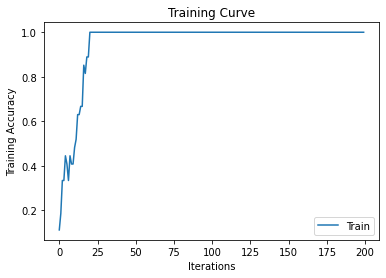

Final Training Accuracy: 1.0


In [ ]:
# Plotting the values with the already formulated CNN and other hyperparameters
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,3,3],[1,1,1]))
conv_net = convolutionalNN([3,16,32],[16,32,64],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  conv_net.cuda()
train_small(conv_net,small_dataset,200,0.001)

*Observation:* It can be seen that model is getting overfitted pretty fast with adam optimizer, but with the same model on SGD we were not able to overfit the data. Therefore adam optimizer is taken as the common optimizer from here on.

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

From the articles browsed from web, it seems to show that deeper network is always better than wider network as each layer tends to learn different kind of pattern, Therefore, instead of Increasing the number of convolutional layers, we can tune 

1) output channels in the convolutional layers [to find the opitmal combination of deeper vs wider network], 

2) batch size can be varied in order for the model to generalise better.

3) Filter size and stride in convolution layer can be changed to understand the importance of smaller vs larger filter size

4) Learning rate for optimization, to avoid getting struck in a local minimum.

since we can get better optimization using Adam optimizer instead of SGD we will be using Adam optimizer

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Epoch 1/20 : Training Accuracy: 0.11311053984575835 : Validation Accuracy: 0.11053984575835475
Epoch 2/20 : Training Accuracy: 0.10732647814910026 : Validation Accuracy: 0.13881748071979436
Epoch 3/20 : Training Accuracy: 0.2609254498714653 : Validation Accuracy: 0.2442159383033419
Epoch 4/20 : Training Accuracy: 0.41516709511568123 : Validation Accuracy: 0.35218508997429304
Epoch 5/20 : Training Accuracy: 0.6368894601542416 : Validation Accuracy: 0.6195372750642674
Epoch 6/20 : Training Accuracy: 0.7197943444730077 : Validation Accuracy: 0.6529562982005142
Epoch 7/20 : Training Accuracy: 0.8110539845758354 : Validation Accuracy: 0.6863753213367609
Epoch 8/20 : Training Accuracy: 0.8688946015424165 : Validation Accuracy: 0.699228791773779
Epoch 9/20 : Training Accuracy: 0.9453727506426736 : Validation Accuracy: 0.7249357326478149
Epoch 10/20 : Training Accuracy: 0.8682519280205655 : Validation Accuracy: 0.6349614395886889
Epoch 11/20 : Training Accuracy: 0.9582262210796915 : Validation

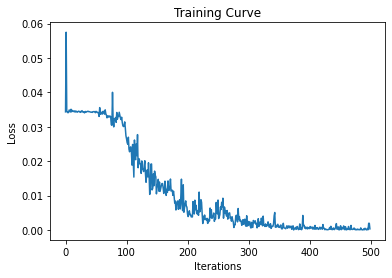

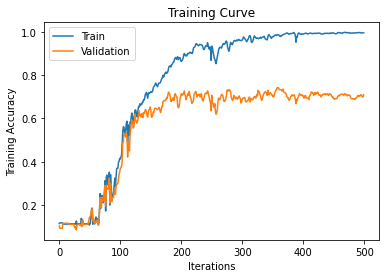

Final Training Accuracy: 0.9961439588688946
Final Validation Accuracy: 0.7095115681233933


In [ ]:
# using the training and validation dataset on the main function and the convolution NN (default settings with 1 stride for all and 3 filter size for all)
torch.cuda.empty_cache()
value = int(to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1]))
default_conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  default_conv_net.cuda()
train(default_conv_net,dataset_train,dataset_val,64,20,0.01)

Observation: We were able to obtain higher training accuracy for 20 epochs but validatio accuracy obtained is very less, therefore we may need to generalise the data more. we can try reducing the learning rate.

Epoch 1/20 : Training Accuracy: 0.2275064267352185 : Validation Accuracy: 0.20822622107969152
Epoch 2/20 : Training Accuracy: 0.37017994858611825 : Validation Accuracy: 0.3213367609254499
Epoch 3/20 : Training Accuracy: 0.4787917737789203 : Validation Accuracy: 0.45758354755784064
Epoch 4/20 : Training Accuracy: 0.5886889460154242 : Validation Accuracy: 0.5372750642673522
Epoch 5/20 : Training Accuracy: 0.653598971722365 : Validation Accuracy: 0.6375321336760925
Epoch 6/20 : Training Accuracy: 0.6844473007712082 : Validation Accuracy: 0.6838046272493573
Epoch 7/20 : Training Accuracy: 0.7133676092544987 : Validation Accuracy: 0.7017994858611826
Epoch 8/20 : Training Accuracy: 0.7345758354755784 : Validation Accuracy: 0.7069408740359897
Epoch 9/20 : Training Accuracy: 0.7223650385604113 : Validation Accuracy: 0.6863753213367609
Epoch 10/20 : Training Accuracy: 0.7744215938303342 : Validation Accuracy: 0.7197943444730077
Epoch 11/20 : Training Accuracy: 0.788560411311054 : Validation Acc

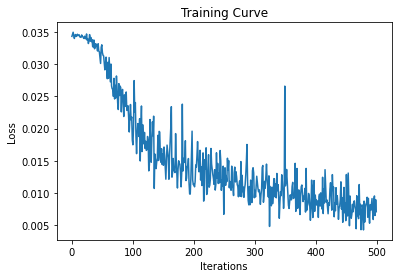

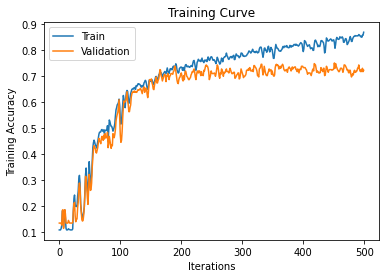

Final Training Accuracy: 0.8688946015424165
Final Validation Accuracy: 0.7223650385604113


In [ ]:
# Changing the learning rate to 0.001 from 0.01
torch.cuda.empty_cache()
value = int(to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1]))
lr_conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net.cuda()
train(lr_conv_net,dataset_train,dataset_val,64,20,0.001)

Observation: Training is less since the learning rate was less but the validation accuracy doesnt seem to drastically increase

Epoch 1/20 : Training Accuracy: 0.23393316195372751 : Validation Accuracy: 0.20308483290488433
Epoch 2/20 : Training Accuracy: 0.3116966580976864 : Validation Accuracy: 0.30077120822622105
Epoch 3/20 : Training Accuracy: 0.5199228791773779 : Validation Accuracy: 0.5604113110539846
Epoch 4/20 : Training Accuracy: 0.5906169665809768 : Validation Accuracy: 0.6246786632390745
Epoch 5/20 : Training Accuracy: 0.6227506426735219 : Validation Accuracy: 0.6349614395886889
Epoch 6/20 : Training Accuracy: 0.7107969151670951 : Validation Accuracy: 0.7095115681233933
Epoch 7/20 : Training Accuracy: 0.7005141388174807 : Validation Accuracy: 0.6838046272493573
Epoch 8/20 : Training Accuracy: 0.7352185089974294 : Validation Accuracy: 0.699228791773779
Epoch 9/20 : Training Accuracy: 0.730719794344473 : Validation Accuracy: 0.6812339331619537
Epoch 10/20 : Training Accuracy: 0.7461439588688946 : Validation Accuracy: 0.699228791773779
Epoch 11/20 : Training Accuracy: 0.7718508997429306 : Validation Accu

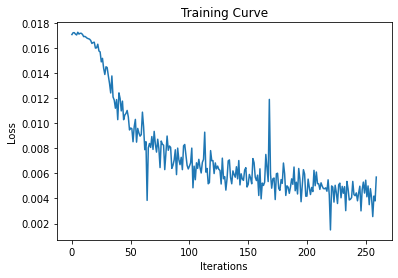

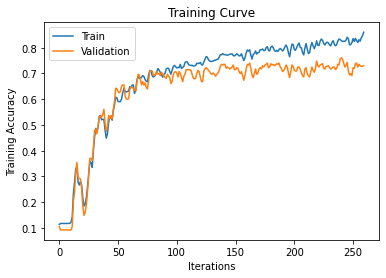

Final Training Accuracy: 0.8598971722365039
Final Validation Accuracy: 0.7300771208226221


In [ ]:
# Changing the learning rate to 0.001 from 0.01 and changing the batch size to 128 to add more genaralising capacity
torch.cuda.empty_cache()
value = int(to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1]))
bs_128_conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  bs_128_conv_net.cuda()
train(bs_128_conv_net,dataset_train,dataset_val,128,20,0.001)

Epoch 1/20 : Training Accuracy: 0.10604113110539845 : Validation Accuracy: 0.07712082262210797
Epoch 2/20 : Training Accuracy: 0.10604113110539845 : Validation Accuracy: 0.07712082262210797
Epoch 3/20 : Training Accuracy: 0.18830334190231363 : Validation Accuracy: 0.2210796915167095
Epoch 4/20 : Training Accuracy: 0.36246786632390743 : Validation Accuracy: 0.35218508997429304
Epoch 5/20 : Training Accuracy: 0.5539845758354756 : Validation Accuracy: 0.5629820051413882
Epoch 6/20 : Training Accuracy: 0.62146529562982 : Validation Accuracy: 0.6195372750642674
Epoch 7/20 : Training Accuracy: 0.6542416452442159 : Validation Accuracy: 0.6298200514138818
Epoch 8/20 : Training Accuracy: 0.6760925449871465 : Validation Accuracy: 0.6349614395886889
Epoch 9/20 : Training Accuracy: 0.7152956298200515 : Validation Accuracy: 0.7017994858611826
Epoch 10/20 : Training Accuracy: 0.7152956298200515 : Validation Accuracy: 0.6786632390745502
Epoch 11/20 : Training Accuracy: 0.7088688946015425 : Validation

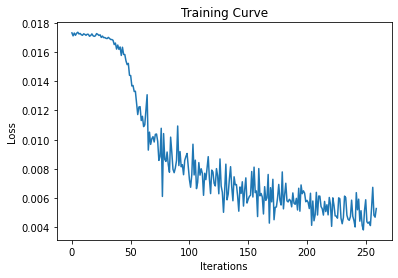

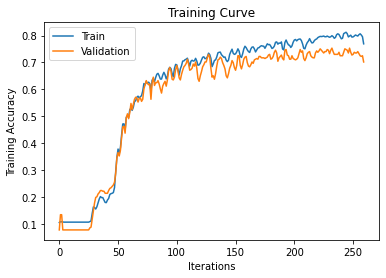

Final Training Accuracy: 0.769280205655527
Final Validation Accuracy: 0.7017994858611826


In [ ]:
# Changing the learning rate to 0.001 and running the same again
torch.cuda.empty_cache()
value = int(to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1]))
bs_32_conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  bs_32_conv_net.cuda()
train(bs_32_conv_net,dataset_train,dataset_val,128,20,0.001)

Epoch 1/40 : Training Accuracy: 0.18187660668380462 : Validation Accuracy: 0.15167095115681234
Epoch 2/40 : Training Accuracy: 0.16966580976863754 : Validation Accuracy: 0.15424164524421594
Epoch 3/40 : Training Accuracy: 0.2859897172236504 : Validation Accuracy: 0.32904884318766064
Epoch 4/40 : Training Accuracy: 0.39331619537275064 : Validation Accuracy: 0.40102827763496146
Epoch 5/40 : Training Accuracy: 0.42480719794344474 : Validation Accuracy: 0.39845758354755784
Epoch 6/40 : Training Accuracy: 0.5244215938303342 : Validation Accuracy: 0.5501285347043702
Epoch 7/40 : Training Accuracy: 0.5501285347043702 : Validation Accuracy: 0.5758354755784062
Epoch 8/40 : Training Accuracy: 0.6137532133676092 : Validation Accuracy: 0.6195372750642674
Epoch 9/40 : Training Accuracy: 0.6645244215938303 : Validation Accuracy: 0.6478149100257069
Epoch 10/40 : Training Accuracy: 0.6696658097686375 : Validation Accuracy: 0.6529562982005142
Epoch 11/40 : Training Accuracy: 0.6953727506426736 : Valida

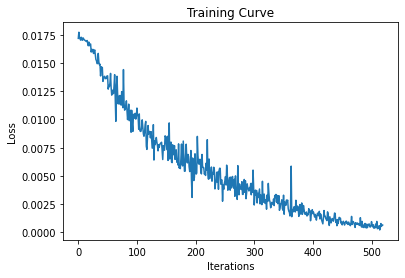

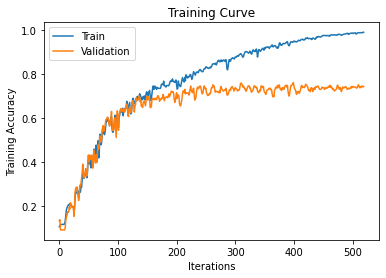

Final Training Accuracy: 0.9890745501285347
Final Validation Accuracy: 0.7429305912596401


In [ ]:
# Increasing epochs to 40
torch.cuda.empty_cache()
value = int(to_linear([3,6,10],[6,10,14],[3,3,3],[1,1,1]))
bs_128_conv_net = convolutionalNN([3,6,10],[6,10,14],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  bs_128_conv_net.cuda()
train(bs_128_conv_net,dataset_train,dataset_val,128,40,0.001)

Observation: From variying the batch size and learning rate we can see that validation accuracy does not see to raise above 75%, lets try to change the input and output channel of the convolution layer to increase the learnability of the models.

Epoch 1/20 : Training Accuracy: 0.21143958868894602 : Validation Accuracy: 0.21079691516709512
Epoch 2/20 : Training Accuracy: 0.4762210796915167 : Validation Accuracy: 0.4652956298200514
Epoch 3/20 : Training Accuracy: 0.5809768637532133 : Validation Accuracy: 0.532133676092545
Epoch 4/20 : Training Accuracy: 0.679305912596401 : Validation Accuracy: 0.6375321336760925
Epoch 5/20 : Training Accuracy: 0.6606683804627249 : Validation Accuracy: 0.6272493573264781
Epoch 6/20 : Training Accuracy: 0.7088688946015425 : Validation Accuracy: 0.6606683804627249
Epoch 7/20 : Training Accuracy: 0.6973007712082262 : Validation Accuracy: 0.6401028277634961
Epoch 8/20 : Training Accuracy: 0.762853470437018 : Validation Accuracy: 0.7017994858611826
Epoch 9/20 : Training Accuracy: 0.775706940874036 : Validation Accuracy: 0.6812339331619537
Epoch 10/20 : Training Accuracy: 0.8091259640102828 : Validation Accuracy: 0.7197943444730077
Epoch 11/20 : Training Accuracy: 0.8168380462724936 : Validation Accura

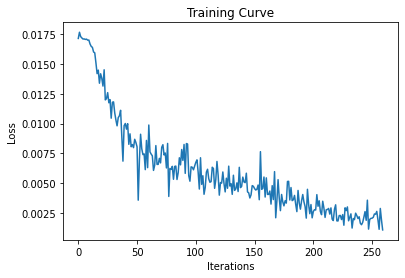

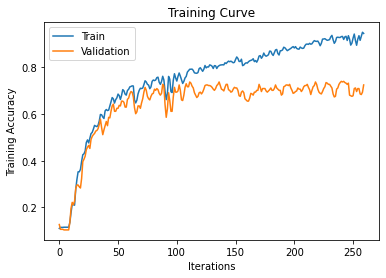

Final Training Accuracy: 0.9460154241645244
Final Validation Accuracy: 0.7249357326478149


In [ ]:
# changing the input and output channel 
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,3,3],[1,1,1]))
S_conv_net = convolutionalNN([3,16,32],[16,32,64],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  S_conv_net.cuda()
train(S_conv_net,dataset_train,dataset_val,128,20,0.001)

Observation: Since the validation accuracy seems to be improving lets make the learning rate as 0.01 and run it again for 20 epochs

Epoch 1/20 : Training Accuracy: 0.11953727506426735 : Validation Accuracy: 0.09768637532133675
Epoch 2/20 : Training Accuracy: 0.19087403598971722 : Validation Accuracy: 0.16195372750642673
Epoch 3/20 : Training Accuracy: 0.2095115681233933 : Validation Accuracy: 0.20308483290488433
Epoch 4/20 : Training Accuracy: 0.22043701799485863 : Validation Accuracy: 0.2467866323907455
Epoch 5/20 : Training Accuracy: 0.2487146529562982 : Validation Accuracy: 0.2699228791773779
Epoch 6/20 : Training Accuracy: 0.2358611825192802 : Validation Accuracy: 0.21079691516709512
Epoch 7/20 : Training Accuracy: 0.22557840616966582 : Validation Accuracy: 0.2262210796915167
Epoch 8/20 : Training Accuracy: 0.2551413881748072 : Validation Accuracy: 0.2365038560411311
Epoch 9/20 : Training Accuracy: 0.2750642673521851 : Validation Accuracy: 0.2930591259640103
Epoch 10/20 : Training Accuracy: 0.2795629820051414 : Validation Accuracy: 0.2262210796915167
Epoch 11/20 : Training Accuracy: 0.2827763496143959 : Validat

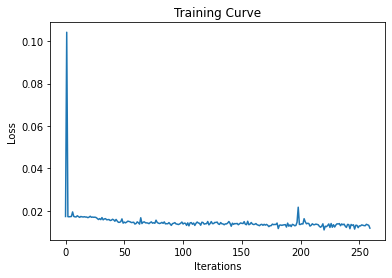

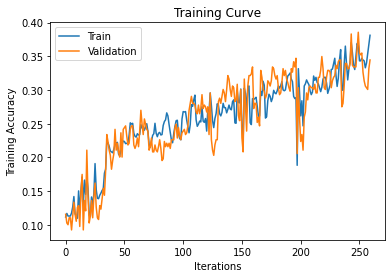

Final Training Accuracy: 0.38110539845758357
Final Validation Accuracy: 0.3444730077120823


In [30]:
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,3,3],[1,1,1]))
lr_conv_net = convolutionalNN([3,16,32],[16,32,64],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net.cuda()
train(lr_conv_net,dataset_train,dataset_val,128,20,0.01)

Epoch 1/40 : Training Accuracy: 0.11182519280205655 : Validation Accuracy: 0.11568123393316196
Epoch 2/40 : Training Accuracy: 0.11182519280205655 : Validation Accuracy: 0.11568123393316196
Epoch 3/40 : Training Accuracy: 0.11182519280205655 : Validation Accuracy: 0.11568123393316196
Epoch 4/40 : Training Accuracy: 0.11182519280205655 : Validation Accuracy: 0.11568123393316196
Epoch 5/40 : Training Accuracy: 0.11760925449871465 : Validation Accuracy: 0.09254498714652956
Epoch 6/40 : Training Accuracy: 0.13110539845758354 : Validation Accuracy: 0.10539845758354756
Epoch 7/40 : Training Accuracy: 0.27570694087403597 : Validation Accuracy: 0.2467866323907455
Epoch 8/40 : Training Accuracy: 0.43573264781491 : Validation Accuracy: 0.40359897172236503
Epoch 9/40 : Training Accuracy: 0.5989717223650386 : Validation Accuracy: 0.583547557840617
Epoch 10/40 : Training Accuracy: 0.6375321336760925 : Validation Accuracy: 0.5681233933161953
Epoch 11/40 : Training Accuracy: 0.7140102827763496 : Vali

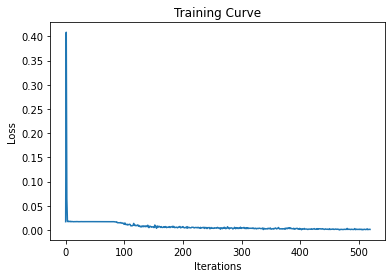

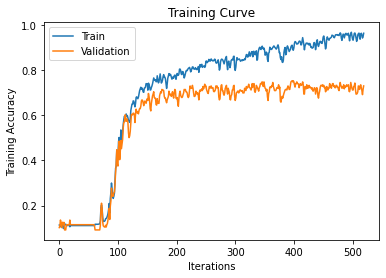

Final Training Accuracy: 0.9633676092544987
Final Validation Accuracy: 0.7300771208226221


In [31]:
# Increasing the epochs again to check the model
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,3,3],[1,1,1]))
lr_conv_net_2 = convolutionalNN([3,16,32],[16,32,64],[3,3,3],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_2.cuda()
train(lr_conv_net_2,dataset_train,dataset_val,128,40,0.01)

Observation: This doesnt necessarily seem to increase the output as required.

Epoch 1/20 : Training Accuracy: 0.10925449871465295 : Validation Accuracy: 0.12596401028277635
Epoch 2/20 : Training Accuracy: 0.19087403598971722 : Validation Accuracy: 0.20565552699228792
Epoch 3/20 : Training Accuracy: 0.33226221079691515 : Validation Accuracy: 0.31362467866323906
Epoch 4/20 : Training Accuracy: 0.4749357326478149 : Validation Accuracy: 0.46786632390745503
Epoch 5/20 : Training Accuracy: 0.5584832904884319 : Validation Accuracy: 0.4884318766066838
Epoch 6/20 : Training Accuracy: 0.5777634961439588 : Validation Accuracy: 0.5012853470437018
Epoch 7/20 : Training Accuracy: 0.622107969151671 : Validation Accuracy: 0.5552699228791774
Epoch 8/20 : Training Accuracy: 0.6619537275064268 : Validation Accuracy: 0.6195372750642674
Epoch 9/20 : Training Accuracy: 0.6998714652956298 : Validation Accuracy: 0.6606683804627249
Epoch 10/20 : Training Accuracy: 0.730719794344473 : Validation Accuracy: 0.6735218508997429
Epoch 11/20 : Training Accuracy: 0.7345758354755784 : Validation

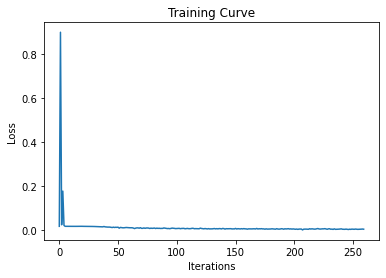

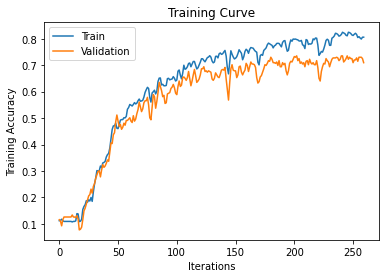

Final Training Accuracy: 0.8059125964010283
Final Validation Accuracy: 0.7095115681233933


In [33]:
# Changing the filter size
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,5],[1,1,1]))
lr_conv_net_3 = convolutionalNN([3,16,32],[16,32,64],[3,5,5],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_3.cuda()
train(lr_conv_net_3,dataset_train,dataset_val,128,20,0.01)

Observation: By changing the filter size our model seems to train better and difference between the validation and training set is not high

Epoch 1/20 : Training Accuracy: 0.14203084832904883 : Validation Accuracy: 0.13624678663239073
Epoch 2/20 : Training Accuracy: 0.35539845758354754 : Validation Accuracy: 0.2827763496143959
Epoch 3/20 : Training Accuracy: 0.5263496143958869 : Validation Accuracy: 0.5012853470437018
Epoch 4/20 : Training Accuracy: 0.6529562982005142 : Validation Accuracy: 0.6632390745501285
Epoch 5/20 : Training Accuracy: 0.6902313624678663 : Validation Accuracy: 0.6735218508997429
Epoch 6/20 : Training Accuracy: 0.6844473007712082 : Validation Accuracy: 0.6915167095115681
Epoch 7/20 : Training Accuracy: 0.737146529562982 : Validation Accuracy: 0.7300771208226221
Epoch 8/20 : Training Accuracy: 0.7326478149100257 : Validation Accuracy: 0.7146529562982005
Epoch 9/20 : Training Accuracy: 0.7159383033419023 : Validation Accuracy: 0.6735218508997429
Epoch 10/20 : Training Accuracy: 0.7487146529562982 : Validation Accuracy: 0.7043701799485861
Epoch 11/20 : Training Accuracy: 0.7519280205655527 : Validation Ac

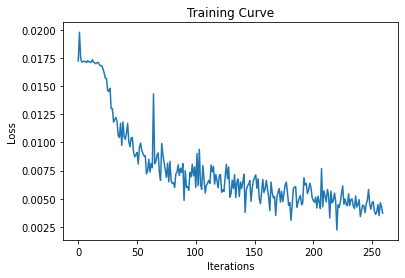

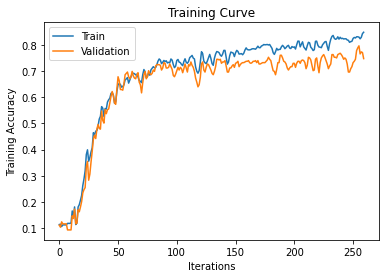

Final Training Accuracy: 0.8489717223650386
Final Validation Accuracy: 0.7480719794344473


In [34]:
# Changing the filter size again
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[1,1,1]))
lr_conv_net_3 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[1,1,1],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_3.cuda()
train(lr_conv_net_3,dataset_train,dataset_val,128,20,0.001)

Observation: The combination of 3,5,7 for the sucessive filters works best, therefore taking this combination.

Epoch 1/30 : Training Accuracy: 0.37532133676092544 : Validation Accuracy: 0.35218508997429304
Epoch 2/30 : Training Accuracy: 0.6272493573264781 : Validation Accuracy: 0.5681233933161953
Epoch 3/30 : Training Accuracy: 0.7011568123393316 : Validation Accuracy: 0.699228791773779
Epoch 4/30 : Training Accuracy: 0.7352185089974294 : Validation Accuracy: 0.7172236503856041
Epoch 5/30 : Training Accuracy: 0.7519280205655527 : Validation Accuracy: 0.7172236503856041
Epoch 6/30 : Training Accuracy: 0.7731362467866324 : Validation Accuracy: 0.7480719794344473
Epoch 7/30 : Training Accuracy: 0.8039845758354756 : Validation Accuracy: 0.7763496143958869
Epoch 8/30 : Training Accuracy: 0.8033419023136247 : Validation Accuracy: 0.7352185089974294
Epoch 9/30 : Training Accuracy: 0.8277634961439588 : Validation Accuracy: 0.7712082262210797
Epoch 10/30 : Training Accuracy: 0.8483290488431876 : Validation Accuracy: 0.794344473007712
Epoch 11/30 : Training Accuracy: 0.8952442159383034 : Validation Accu

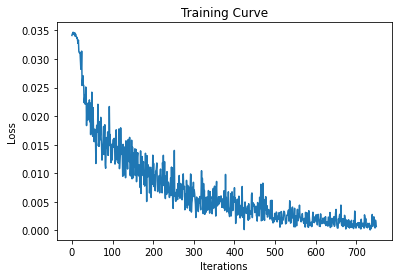

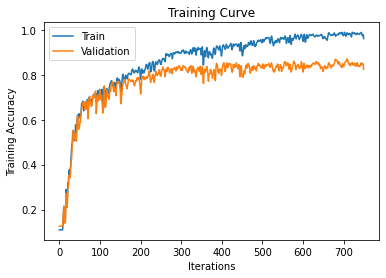

Final Training Accuracy: 0.961439588688946
Final Validation Accuracy: 0.8251928020565553


In [29]:
# chaning the stride size to increase the generalising capacity
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[1,2,2]))
lr_conv_net_4 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[1,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_4.cuda()
train(lr_conv_net_4,dataset_train,dataset_val,64,30,0.001)

Observation: with batchsize 64 and epochs 30 we were able to obtain validation accuracy of 82.5% 

Epoch 1/20 : Training Accuracy: 0.10925449871465295 : Validation Accuracy: 0.12596401028277635
Epoch 2/20 : Training Accuracy: 0.13624678663239073 : Validation Accuracy: 0.16195372750642673
Epoch 3/20 : Training Accuracy: 0.17352185089974292 : Validation Accuracy: 0.13881748071979436
Epoch 4/20 : Training Accuracy: 0.17159383033419023 : Validation Accuracy: 0.14652956298200515
Epoch 5/20 : Training Accuracy: 0.24293059125964012 : Validation Accuracy: 0.2133676092544987
Epoch 6/20 : Training Accuracy: 0.3740359897172236 : Validation Accuracy: 0.36503856041131105
Epoch 7/20 : Training Accuracy: 0.5051413881748072 : Validation Accuracy: 0.5038560411311054
Epoch 8/20 : Training Accuracy: 0.5996143958868895 : Validation Accuracy: 0.5655526992287918
Epoch 9/20 : Training Accuracy: 0.6452442159383034 : Validation Accuracy: 0.6246786632390745
Epoch 10/20 : Training Accuracy: 0.6857326478149101 : Validation Accuracy: 0.6760925449871465
Epoch 11/20 : Training Accuracy: 0.7146529562982005 : Valid

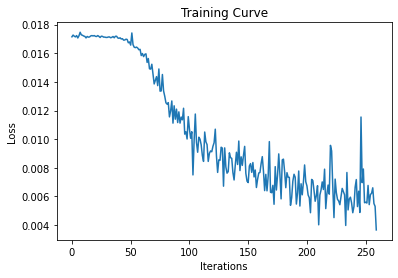

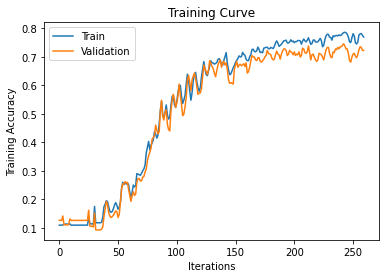

Final Training Accuracy: 0.769280205655527
Final Validation Accuracy: 0.7223650385604113


In [30]:
# increasig the stride for the first layer as well
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[2,2,2]))
lr_conv_net_5 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[2,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_5.cuda()
train(lr_conv_net_5,dataset_train,dataset_val,128,20,0.001)

Observation; This seems promising, therefore trying with more number of epochs

Epoch 1/30 : Training Accuracy: 0.12275064267352186 : Validation Accuracy: 0.11311053984575835
Epoch 2/30 : Training Accuracy: 0.12532133676092544 : Validation Accuracy: 0.10539845758354756
Epoch 3/30 : Training Accuracy: 0.18316195372750643 : Validation Accuracy: 0.1953727506426735
Epoch 4/30 : Training Accuracy: 0.48586118251928023 : Validation Accuracy: 0.41645244215938304
Epoch 5/30 : Training Accuracy: 0.5571979434447301 : Validation Accuracy: 0.5167095115681234
Epoch 6/30 : Training Accuracy: 0.5874035989717223 : Validation Accuracy: 0.5784061696658098
Epoch 7/30 : Training Accuracy: 0.6850899742930592 : Validation Accuracy: 0.7043701799485861
Epoch 8/30 : Training Accuracy: 0.7140102827763496 : Validation Accuracy: 0.6915167095115681
Epoch 9/30 : Training Accuracy: 0.712082262210797 : Validation Accuracy: 0.7043701799485861
Epoch 10/30 : Training Accuracy: 0.7332904884318766 : Validation Accuracy: 0.7146529562982005
Epoch 11/30 : Training Accuracy: 0.7223650385604113 : Validatio

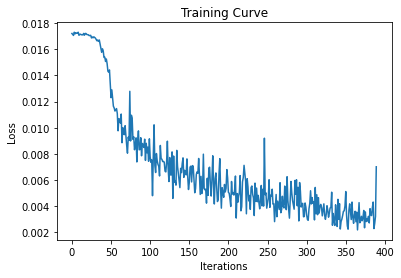

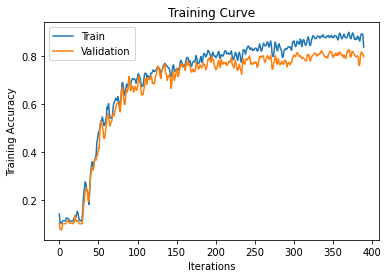

Final Training Accuracy: 0.8374035989717223
Final Validation Accuracy: 0.7969151670951157


In [31]:
# increased Epochs
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[2,2,2]))
lr_conv_net_6 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[2,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_6.cuda()
train(lr_conv_net_6,dataset_train,dataset_val,128,30,0.001)

Observation: though the accuracy of training and validation doesnt seem too big the value of the validation doesnt seem to increase, therefore we can increase the learning rate to see the extend of the initial kernal size increase impact.

Epoch 1/30 : Training Accuracy: 0.11439588688946016 : Validation Accuracy: 0.10282776349614396
Epoch 2/30 : Training Accuracy: 0.2345758354755784 : Validation Accuracy: 0.20565552699228792
Epoch 3/30 : Training Accuracy: 0.30526992287917737 : Validation Accuracy: 0.3496143958868895
Epoch 4/30 : Training Accuracy: 0.5359897172236504 : Validation Accuracy: 0.5526992287917738
Epoch 5/30 : Training Accuracy: 0.5237789203084833 : Validation Accuracy: 0.5372750642673522
Epoch 6/30 : Training Accuracy: 0.6863753213367609 : Validation Accuracy: 0.6812339331619537
Epoch 7/30 : Training Accuracy: 0.6510282776349614 : Validation Accuracy: 0.6118251928020566
Epoch 8/30 : Training Accuracy: 0.7230077120822622 : Validation Accuracy: 0.6940874035989717
Epoch 9/30 : Training Accuracy: 0.7602827763496144 : Validation Accuracy: 0.7300771208226221
Epoch 10/30 : Training Accuracy: 0.7660668380462725 : Validation Accuracy: 0.7686375321336761
Epoch 11/30 : Training Accuracy: 0.7487146529562982 : Validation 

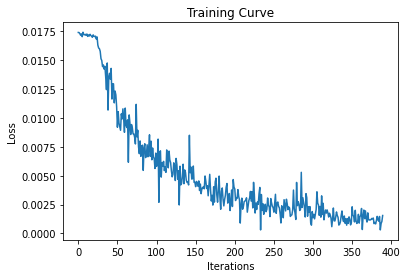

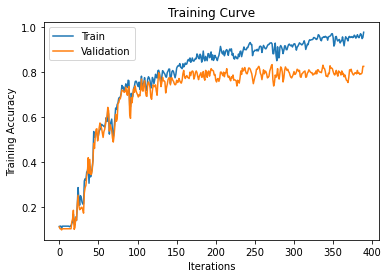

Final Training Accuracy: 0.9768637532133676
Final Validation Accuracy: 0.8251928020565553


In [32]:
# checking the same with increased learning rate
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[2,2,2]))
lr_conv_net_8 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[2,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_8.cuda()
train(lr_conv_net_8,dataset_train,dataset_val,128,30,0.01)

Observaiton: We can see that validation accuracy has increased but not by a drastic amount compared to batchsize 64 with 1,2,2 stride.

Epoch 1/30 : Training Accuracy: 0.11760925449871465 : Validation Accuracy: 0.09254498714652956
Epoch 2/30 : Training Accuracy: 0.31876606683804626 : Validation Accuracy: 0.33676092544987146
Epoch 3/30 : Training Accuracy: 0.44601542416452444 : Validation Accuracy: 0.4601542416452442
Epoch 4/30 : Training Accuracy: 0.5199228791773779 : Validation Accuracy: 0.5347043701799485
Epoch 5/30 : Training Accuracy: 0.5269922879177378 : Validation Accuracy: 0.519280205655527
Epoch 6/30 : Training Accuracy: 0.6439588688946015 : Validation Accuracy: 0.6632390745501285
Epoch 7/30 : Training Accuracy: 0.6529562982005142 : Validation Accuracy: 0.6812339331619537
Epoch 8/30 : Training Accuracy: 0.7217223650385605 : Validation Accuracy: 0.7197943444730077
Epoch 9/30 : Training Accuracy: 0.7455012853470437 : Validation Accuracy: 0.7429305912596401
Epoch 10/30 : Training Accuracy: 0.7326478149100257 : Validation Accuracy: 0.7429305912596401
Epoch 11/30 : Training Accuracy: 0.7699228791773779 : Validation 

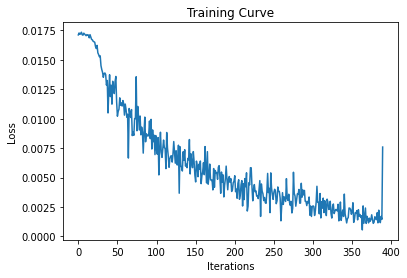

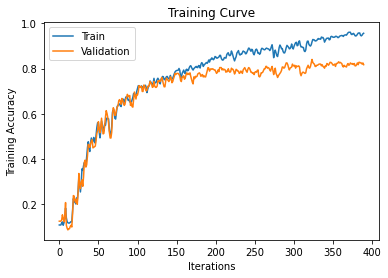

Final Training Accuracy: 0.9562982005141388
Final Validation Accuracy: 0.8174807197943444


In [33]:
# running the 1,2,2 stride with 3,5,7 kernal size and chanign the input channel and output channel than the previous network
torch.cuda.empty_cache()
value = int(to_linear([3,64,32],[64,32,16],[3,5,7],[1,2,2]))
lr_conv_net_7 = convolutionalNN([3,64,32],[64,32,16],[3,5,7],[1,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_7.cuda()
train(lr_conv_net_7,dataset_train,dataset_val,128,30,0.001)

Observation: It doesnt seem to increase much than the previous lesser neuron CNN layers.

Epoch 1/30 : Training Accuracy: 0.2538560411311054 : Validation Accuracy: 0.2570694087403599
Epoch 2/30 : Training Accuracy: 0.359254498714653 : Validation Accuracy: 0.35732647814910024
Epoch 3/30 : Training Accuracy: 0.5359897172236504 : Validation Accuracy: 0.5012853470437018
Epoch 4/30 : Training Accuracy: 0.6266066838046273 : Validation Accuracy: 0.5989717223650386
Epoch 5/30 : Training Accuracy: 0.6330334190231363 : Validation Accuracy: 0.6349614395886889
Epoch 6/30 : Training Accuracy: 0.7345758354755784 : Validation Accuracy: 0.7326478149100257
Epoch 7/30 : Training Accuracy: 0.762853470437018 : Validation Accuracy: 0.7197943444730077
Epoch 8/30 : Training Accuracy: 0.7750642673521851 : Validation Accuracy: 0.7197943444730077
Epoch 9/30 : Training Accuracy: 0.8116966580976864 : Validation Accuracy: 0.7480719794344473
Epoch 10/30 : Training Accuracy: 0.8161953727506427 : Validation Accuracy: 0.7532133676092545
Epoch 11/30 : Training Accuracy: 0.8438303341902313 : Validation Accur

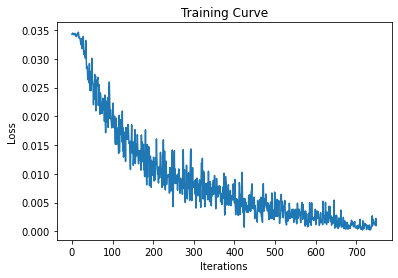

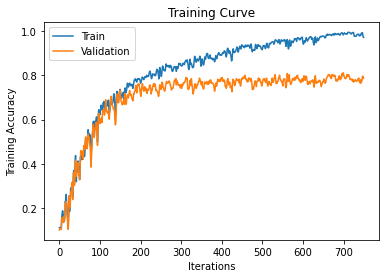

Final Training Accuracy: 0.9697943444730077
Final Validation Accuracy: 0.7866323907455013


In [33]:
# Running the changed in/out channels with 64 batch size with 7,3,5 kernal size
torch.cuda.empty_cache()
value = int(to_linear([3,64,32],[64,32,16],[7,5,3],[1,2,2]))
lr_conv_net_9 = convolutionalNN([3,64,32],[64,32,16],[7,5,3],[1,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_9.cuda()
train(lr_conv_net_9,dataset_train,dataset_val,64,30,0.001)

Observation: By increasing the Kernal size for the initial layer and decreasing the filter size for the upcoming layers, tends to increase the training accuracy but validation accuracy doesnt seem to increase that much.

Epoch 1/30 : Training Accuracy: 0.21143958868894602 : Validation Accuracy: 0.2262210796915167
Epoch 2/30 : Training Accuracy: 0.4241645244215938 : Validation Accuracy: 0.44473007712082263
Epoch 3/30 : Training Accuracy: 0.5038560411311054 : Validation Accuracy: 0.43444730077120824
Epoch 4/30 : Training Accuracy: 0.6259640102827764 : Validation Accuracy: 0.5784061696658098
Epoch 5/30 : Training Accuracy: 0.6780205655526992 : Validation Accuracy: 0.6143958868894601
Epoch 6/30 : Training Accuracy: 0.7699228791773779 : Validation Accuracy: 0.7172236503856041
Epoch 7/30 : Training Accuracy: 0.7776349614395887 : Validation Accuracy: 0.712082262210797
Epoch 8/30 : Training Accuracy: 0.7718508997429306 : Validation Accuracy: 0.6812339331619537
Epoch 9/30 : Training Accuracy: 0.8232647814910026 : Validation Accuracy: 0.7583547557840618
Epoch 10/30 : Training Accuracy: 0.8367609254498715 : Validation Accuracy: 0.7712082262210797
Epoch 11/30 : Training Accuracy: 0.8521850899742931 : Validation Ac

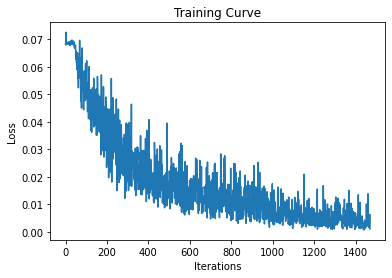

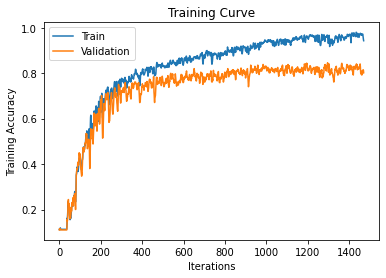

Final Training Accuracy: 0.9428020565552699
Final Validation Accuracy: 0.8020565552699229


In [30]:
# checking the optimal combination with lower batch size (32)
torch.cuda.empty_cache()
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[1,2,2]))
lr_conv_net_10 = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[1,2,2],value)
if use_cuda and torch.cuda.is_available():
  lr_conv_net_10.cuda()
train(lr_conv_net_10,dataset_train,dataset_val,32,30,0.001)

we can see that as we tend to reduce the batch size the variation in the error seems to be high but the value of the accuracy in training and validation is comparable to the other networks trained.

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best model that was generated in the hyperparameter tuning was model with input channel [3,16,32] and output channel [16,32,64], kernal size of [3,5,7] and stride for each kernal [1,2,2] for each convolution layer respectively. and with batch size of 64, learning rate of 0.001 and in 30 epochs. 
Also, Adam optimizer and cross entropy loss was utlised. 

was able to obtain 82.5% validation accuracy and 96% training accuracy. 

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [32]:
value = int(to_linear([3,16,32],[16,32,64],[3,5,7],[1,2,2]))
net = convolutionalNN([3,16,32],[16,32,64],[3,5,7],[1,2,2],value)
if use_cuda and torch.cuda.is_available():
  net.cuda()
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

In [45]:
test_loader = torch.utils.data.DataLoader(dataset_test,shuffle=True,batch_size=32)
test_accuracy = get_accuracy(net,test_loader)
print("Test accuracy for the best model is:", round(test_accuracy,4))

Test accuracy for the best model is: 0.8374


### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [26]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [27]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
features = alexnet.features(X_train)
features.shape

torch.Size([1556, 256, 6, 6])

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [28]:
data_loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=1, shuffle=True)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1, shuffle=True)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=1, shuffle=True)

In [29]:
# making directories for storing the tensors
os.mkdir('Computed_Feature')
os.mkdir('Computed_Feature/training/')
os.mkdir('Computed_Feature/validation/')
os.mkdir('Computed_Feature/testing/')

In [30]:
def compute_feature(data_loader, value):
  for i ,data in enumerate(data_loader):
    img, label = data
    features = alexnet.features(img)
    dummy_variable = torch.from_numpy(features.detach().numpy()) # detaching the label
    folder_path = f'Computed_Feature/{value}/{classes[label]}/'
    if not os.path.isdir(folder_path):
      os.mkdir(folder_path)
      print(f'making directory for {value } {classes[label]}') 
    torch.save(dummy_variable.squeeze(0),f'{folder_path}{str(i)}.tensor') # saving the tensor file in the respective class directory
    # print(features.shape)

In [31]:
# running the training, validation and testing data loader in their respective directory
compute_feature(data_loader_train,"training")
compute_feature(data_loader_val,"validation")
compute_feature(data_loader_test,"testing")

making directory for training C
making directory for training G
making directory for training H
making directory for training E
making directory for training B
making directory for training D
making directory for training F
making directory for training I
making directory for training A
making directory for validation A
making directory for validation F
making directory for validation B
making directory for validation D
making directory for validation H
making directory for validation C
making directory for validation E
making directory for validation G
making directory for validation I
making directory for testing E
making directory for testing H
making directory for testing F
making directory for testing B
making directory for testing C
making directory for testing A
making directory for testing I
making directory for testing D
making directory for testing G


In [32]:
# loading the saved dataset folder
train_folder = torchvision.datasets.DatasetFolder('/content/Computed_Feature/training', loader= torch.load, extensions= '.tensor')
validation_folder = torchvision.datasets.DatasetFolder('/content/Computed_Feature/validation',  loader= torch.load, extensions= '.tensor')
testing_folder = torchvision.datasets.DatasetFolder('/content/Computed_Feature/testing',  loader= torch.load, extensions= '.tensor')

In [33]:
# Data loading
training_loader = torch.utils.data.DataLoader(train_folder, batch_size=len(train_folder),shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_folder, batch_size=len(validation_folder),shuffle=True)
testing_loader = torch.utils.data.DataLoader(testing_folder, batch_size=len(testing_folder), shuffle=True)

In [34]:
# checking the shape of the tensor
dataiter = iter(training_loader)
features, labels = dataiter.next()
print(features.shape)

torch.Size([1556, 256, 6, 6])


### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [35]:
class transferlearning_nn(nn.Module):
  # Simple single convolutional layer and 2 fully connected layer since most of the features have been learned
  def __init__(self):

    super(transferlearning_nn, self).__init__()
    self.name = 'TL_CNN'
    self.conv1 = nn.Conv2d(256,32,3,1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(2*2*32, 32)
    self.fc2 = nn.Linear(32, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = x.view(-1, 2*2*32)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1)
    return x

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

Epoch 1/30 : Training Accuracy: 0.8277634961439588 : Validation Accuracy: 0.794344473007712
Epoch 2/30 : Training Accuracy: 0.8836760925449871 : Validation Accuracy: 0.8277634961439588
Epoch 3/30 : Training Accuracy: 0.9415167095115681 : Validation Accuracy: 0.884318766066838
Epoch 4/30 : Training Accuracy: 0.9543701799485861 : Validation Accuracy: 0.9023136246786633
Epoch 5/30 : Training Accuracy: 0.9562982005141388 : Validation Accuracy: 0.8817480719794345
Epoch 6/30 : Training Accuracy: 0.9794344473007712 : Validation Accuracy: 0.8946015424164524
Epoch 7/30 : Training Accuracy: 0.9845758354755784 : Validation Accuracy: 0.8946015424164524
Epoch 8/30 : Training Accuracy: 0.968508997429306 : Validation Accuracy: 0.87146529562982
Epoch 9/30 : Training Accuracy: 0.9961439588688946 : Validation Accuracy: 0.9023136246786633
Epoch 10/30 : Training Accuracy: 0.9980719794344473 : Validation Accuracy: 0.9203084832904884
Epoch 11/30 : Training Accuracy: 1.0 : Validation Accuracy: 0.920308483290

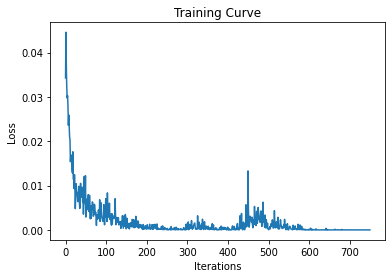

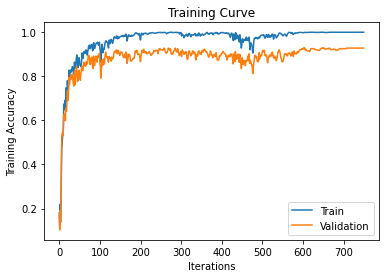

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9280205655526992


In [38]:
# using the transfer learning nn
TL_CNN_1 = transferlearning_nn()
if use_cuda and torch.cuda.is_available():
  TL_CNN_1.cuda()

train(TL_CNN_1,  train_folder, validation_folder, batch_size=64,num_epochs=30)

Observation: With the default setting we were able to get a better result, therefore considering the same as the hyper-parameters tuned in the earlier part(Batch size 64, learning rate 0.01 and number of epochs 30) we were able to obtain validation accuracy of 93%  

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [39]:
get_accuracy(TL_CNN_1,testing_loader)

0.9382716049382716

*Obseravtion:* On testing the same with the unused data, we can see that the testing accuracy is even more than the validaion accuracy, it states that the model has learned the complete dataset i.e.,has generalised better. 

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [40]:
# loading the data (Unzip the file)
zip_ref = zipfile.ZipFile("/content/thomas_reesar_1006892374_assignment.zip", 'r') #Reading the zip file 
zip_ref.extractall() # Extracting the zipped file
zip_ref.close()

In [68]:
# transforming the image to the required format 
transform = transforms.Compose([transforms.Resize([224,224]),
                                transforms.ToTensor()]) # resizing the photo and then converting to tensor
# preprocessing image data and transforming the data
my_dataset = datasets.ImageFolder('/content/thomas_reesar_1006892374_assignment', transform=transform)

In [69]:
# loading my data
my_data_loader = torch.utils.data.DataLoader(my_dataset, batch_size=1, shuffle=True)

In [72]:
# Making directory to store the tensor file
os.mkdir('Computed_Feature/my_data_3/')

In [73]:
# computing my tensor data on the alexnet
compute_feature(my_data_loader,'my_data_3')

my_data_new = torch.utils.data.DataLoader(torchvision.datasets.DatasetFolder('/content/Computed_Feature/my_data_3',  loader= torch.load, extensions= '.tensor'), batch_size=32)

making directory for my_data_3 C
making directory for my_data_3 D
making directory for my_data_3 A
making directory for my_data_3 F
making directory for my_data_3 I
making directory for my_data_3 B
making directory for my_data_3 E
making directory for my_data_3 G
making directory for my_data_3 H


### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [74]:
# checking the accuracy with my dataset using the model developed using transfer learning
get_accuracy(TL_CNN_1,my_data_new)

0.48148148148148145

Observation: We can see that the model has not predicted properly because the dataset produced by me involves lot of translation and orientation. Howver, when looking at the training dataset, the orientation of the dataset is very small. The movement is very limited. Therefore the trained model was not able to perform properly. 

However, a better approach to the problem would have been to include data augumentation while transforming the data. The data translation and rotation should have been employed along with resize and to tensor function. 

In [85]:
# loading the data (Unzip the file)
zip_ref = zipfile.ZipFile("/content/Danny_images_check.zip", 'r') #Reading the zip file 
zip_ref.extractall() # Extracting the zipped file
zip_ref.close()

In [87]:
# transforming the image to the required format 
transform = transforms.Compose([transforms.Resize([224,224]),
                                transforms.ToTensor()]) # resizing the photo and then converting to tensor
# preprocessing image data and transforming the data
my_dataset_check = datasets.ImageFolder('/content/Danny_images_check', transform=transform)

In [88]:
# loading my data
my_data_loader_check = torch.utils.data.DataLoader(my_dataset_check, batch_size=1, shuffle=True)

In [89]:
# Making directory to store the tensor file
os.mkdir('Computed_Feature/my_data_5/')

In [90]:
# computing my tensor data on the alexnet
compute_feature(my_data_loader_check,'my_data_5')

my_data_new_check = torch.utils.data.DataLoader(torchvision.datasets.DatasetFolder('/content/Computed_Feature/my_data_5',  loader= torch.load, extensions= '.tensor'), batch_size=32)

making directory for my_data_5 C
making directory for my_data_5 I
making directory for my_data_5 G
making directory for my_data_5 F
making directory for my_data_5 B
making directory for my_data_5 D
making directory for my_data_5 A
making directory for my_data_5 E
making directory for my_data_5 H


In [91]:
get_accuracy(TL_CNN_1,my_data_new_check)

0.8148148148148148

*Observation:* By changing the images to very minimal translation and providing more exposure to light i was able to obtain accuracy of 81.5% 

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus